# Fixing Skewness - MinMax #

In [1]:
# Importing useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn import preprocessing

# Importing data set
data = pd.read_csv("ReadyDF_Normalization", index_col=0)
print(data.head(3))

       C1   C2        C4      C7  C3'       C5'    C6'       T3'       T4'  \
0  122.00  1.0  0.029074  51.345    1  3.864345  900.0  0.908876  0.640426   
1  152.75  0.0 -0.013352  25.936    0  4.865080    0.0  0.898724  0.644753   
2   90.00  1.0  0.020715   7.378    0  3.369134    0.0  0.909350  0.636816   

        T5'       S1'       S2'       S3'  
0  0.054250  0.004875  0.009199  0.010929  
1  0.051395  0.003258  0.011105  0.010876  
2  0.061764  0.006258  0.006271  0.011403  


In [2]:
## Checking the skewness of the variables from the beginning
data.skew()

###### WE ARE IGNORING C2 AND C3' BECAUSE THEY ARE BINARY ######

C1     0.484764
C2    -2.123926
C4    -0.491134
C7     1.215108
C3'   -0.117764
C5'    0.407167
C6'    0.831200
T3'   -0.410761
T4'   -0.028730
T5'    0.033674
S1'    0.381426
S2'    0.406292
S3'    0.229440
dtype: float64

(array([232., 178.,  49.,  40., 117.,  22.,   8.,  18.,   8.,  10.]),
 array([7.400000e-02, 6.567020e+01, 1.312664e+02, 1.968626e+02,
        2.624588e+02, 3.280550e+02, 3.936512e+02, 4.592474e+02,
        5.248436e+02, 5.904398e+02, 6.560360e+02]),
 <a list of 10 Patch objects>)

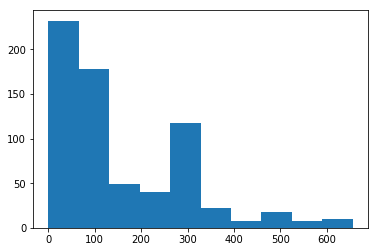

In [3]:
## The only feature that would need fixing for the skew is 'C7'
##### Histogram before fixing the skew
plt.hist(data['C7'])

(array([ 30.,  37.,  46.,  84.,  97., 139.,  54., 138.,  24.,  33.]),
 array([0.41983365, 1.24676247, 2.0736913 , 2.90062013, 3.72754895,
        4.55447778, 5.38140661, 6.20833543, 7.03526426, 7.86219309,
        8.68912191]),
 <a list of 10 Patch objects>)

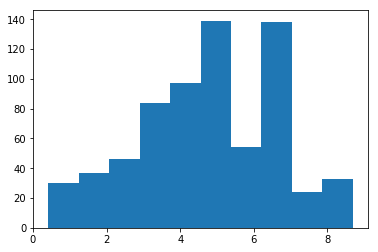

In [4]:
### Fixing the skew with cubed root
data['C7'] = np.cbrt(data['C7'])

### Plotting the histogram after fixing the skew
plt.hist(data['C7'])

In [5]:
### Displaying the skew of the features after fixing C7
data.skew()

C1     0.484764
C2    -2.123926
C4    -0.491134
C7    -0.171688
C3'   -0.117764
C5'    0.407167
C6'    0.831200
T3'   -0.410761
T4'   -0.028730
T5'    0.033674
S1'    0.381426
S2'    0.406292
S3'    0.229440
dtype: float64

In [6]:
## Exporting as csv file
data.to_csv("ReadyDF_Skew", ",")